## Vacances et bagage

Vous allez en vacances et vous avez un nombre d'objets à prendre avec vous, cepenedant, il n'y pas assez d'éspace pour tout prendre dans votre voiture.

Vous essayer donc d'assigner un nombre à chaque objet representant son importance tout en lui assignant un nombre representant l'espace qu'il va prendre dans la voiture. Déterminez les objets à inclure afin que vous ne dépassiez pas la limite d'espace dans la voiture et que la l'importance totale des objets inclues soit la plus élevée possible.

Créer une fonction ```take_objects(obj_importance, obj_sizes, car_space)``` où :
- ```obj_sizes``` de taille $n_{objets}$ represente les poids de chaque objet.
- ```obj_importance``` de taille $n_{objets}$ represente l'importance de chaque objet.
- ```car_space``` est l'espace totale disponible dans la voiture.

Essayer de trouver une solution avec une complexité de $O(n_{objets}\times size)$.


## Solution
En termes de complexite, les meilleurs algorithmes a utiliser sont :
- ```Programmation dynamique``` : Complexite de $O(n_{objets}\times size)$ : Division de probleme en tableau et resolution par partie

### Programmation dynamique

In [1]:
def take_objects(obj_importance, obj_sizes, car_space):
    n_objects = len(obj_importance)

    # Initialisation d'une matrice pour stocker les résultats intermédiaires
    dp_matrix = [[0] * (car_space + 1) for _ in range(n_objects + 1)]

    # Remplissage de la matrice en utilisant la programmation dynamique
    for i in range(1, n_objects + 1):
        for size in range(car_space + 1):
            if obj_sizes[i - 1] <= size:
                dp_matrix[i][size] = max(
                    dp_matrix[i - 1][size],
                    dp_matrix[i - 1][size - obj_sizes[i - 1]] + obj_importance[i - 1]
                )
            else:
                dp_matrix[i][size] = dp_matrix[i - 1][size]

    # Récupération de la capacité maximale atteinte
    max_capacity = dp_matrix[n_objects][car_space]

    # Récupération des objets sélectionnés
    selected_objects = []
    size_remaining = car_space
    for i in range(n_objects, 0, -1):
        if dp_matrix[i][size_remaining] != dp_matrix[i - 1][size_remaining]:
            selected_objects.append((obj_sizes[i - 1], obj_importance[i - 1]))
            size_remaining -= obj_sizes[i - 1]

    # Affichage de la matrice
    print("Matrice:")
    for row in dp_matrix:
        print(row)

    max_size = car_space - size_remaining

    return max_capacity, max_size, selected_objects[::-1]

# Exemple d'utilisation
obj_importance = [4, 2, 5, 8]
obj_sizes = [2, 2, 3, 2]
car_space = 10

result = take_objects(obj_importance, obj_sizes, car_space)
print("\nImportance maximale atteinte:", result[0])
print("Poids maximal atteint:", result[1])
print("\nObjets sélectionnés (poids, importance):", result[2])


Matrice:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[0, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6]
[0, 0, 4, 5, 6, 9, 9, 11, 11, 11, 11]
[0, 0, 8, 8, 12, 13, 14, 17, 17, 19, 19]

Importance maximale atteinte: 19
Poids maximal atteint: 9

Objets sélectionnés (poids, importance): [(2, 4), (2, 2), (3, 5), (2, 8)]


##### Animation

In [2]:
##### idk #####

## Sudoku
Écrivez un programme pour résoudre un puzzle de Sudoku en remplissant les cellules vides.

La solution d'un Sudoku doit satisfaire à toutes les règles suivantes :

- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chaque ligne.
- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chaque colonne.
- Chacun des chiffres 1 à 9 doit apparaître exactement une fois dans chacune des 9 sous-cases 3x3 de la grille.

Créer une fonction ```sudoku(puzzle)``` afficher la solution du puzzle suivant avec matplotlib (metter les cases rempli par votre algorithm dans une autre couleur) :

<img src='https://upload.wikimedia.org/wikipedia/commons/e/e0/Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg' >


Représenter le puzzle en entrée avec une table 2D de taille $9\times 9$ avec les cases vide representé par des 0.

## Carrés Latins

Indicium signifie "trace" en latin. Dans ce problème, nous travaillons avec des carrés latins et des traces matricielles.

Un carré latin est une matrice carrée N par N dans laquelle chaque cellule contient l'une des N valeurs différentes, de sorte qu'aucune valeur n'est répétée dans une ligne ou une colonne. Dans ce problème, nous ne traiterons que des "carrés latins naturels" dans lesquels les N valeurs sont les entiers compris entre 1 et N.

La trace d'une matrice carrée est la somme des valeurs de la diagonale principale (qui va du coin supérieur gauche au coin inférieur droit).

Étant donné les valeurs N et K, produisez n'importe quel "carré latin naturel" N par N avec une trace K, ou dites que c'est impossible. Par exemple, voici deux réponses possibles pour N = 3, K = 6. Dans chaque cas, les valeurs qui contribuent à la trace sont soulignées.

<pre>
<ins>2</ins> 1 3            <ins>3</ins> 1 2
3 <ins>2</ins> 1            1 <ins>2</ins> 3
1 3 <ins>2</ins>            2 3 <ins>1</ins>
</pre>

Créer une fonction ```indicium(n, k)``` qui retourne une des solutions qui peuvent exister ou qui retourne ```None``` si il n'existe pas de solution.

Inspo : [Jacobson Mathews Method](https://blog.paulhankin.net/latinsquares/)

In [3]:
import random

def indicium(n, k):
    def rand2(a, b):
        return (a, b) if random.randint(0, 1) == 0 else (b, a)

    def Latin(n):
        xy = [[0] * n for _ in range(n)]
        xz = [[0] * n for _ in range(n)]
        yz = [[0] * n for _ in range(n)]

        for i in range(n):
            for j in range(n):
                k = (i + j) % n + 1  # Adjusted to start from 1 psk en general tebdA B 0
                xy[i][j] = k
                xz[i][k - 1] = j
                yz[j][k - 1] = i

        mxy, mxz, myz = 0, 0, 0
        m = [0, 0, 0]
        proper = True
        min_iter = n * n * n

        for _ in range(min_iter) if proper else range(min_iter * 10):
            i, j, k, i2, j2, k2 = 0, 0, 0, 0, 0, 0
            i2_, j2_, k2_ = 0, 0, 0

            if proper:
                # Pick a random 1 in the array
                i, j, k = random.randint(0, n - 1), random.randint(0, n - 1), random.randint(1, n)
                while xy[i][j] == k:
                    i, j, k = random.randint(0, n - 1), random.randint(0, n - 1), random.randint(1, n)
                # find i2 such that [i2, j, k] is 1. same for j2, k2
                i2 = yz[j][k - 1]
                j2 = xz[i][k - 1]
                k2 = xy[i][j]
                i2_, j2_, k2_ = i, j, k
            else:
                i, j, k = m[0], m[1], m[2]
                # find one such that [i2, j, k] is 1, same for j2, k2.
                # each is either the value stored in the corresponding
                # slice, or one of our three temporary "extra" 1s.
                # That's because (i, j, k) is -1.
                i2, i2_ = rand2(yz[j][k - 1], myz)
                j2, j2_ = rand2(xz[i][k - 1], mxz)
                k2, k2_ = rand2(xy[i][j], mxy)

            proper = xy[i2][j2] == k2
            if not proper:
                m = [i2, j2, k2]
                mxy = xy[i2][j2]
                myz = yz[j2][k2 - 1]
                mxz = xz[i2][k2 - 1]

            xy[i][j] = k2_
            xy[i][j2] = k2
            xy[i2][j] = k2
            xy[i2][j2] = k

            yz[j][k - 1] = i2_
            yz[j][k2 - 1] = i2
            yz[j2][k - 1] = i2
            yz[j2][k2 - 1] = i

            xz[i][k - 1] = j2_
            xz[i][k2 - 1] = j2
            xz[i2][k - 1] = j2
            xz[i2][k2 - 1] = j

        return xy

    # Attempt to generate Latin squares until a valid one with the desired trace is found
    max_attempts = 1000
    for _ in range(max_attempts):
        latin_square = Latin(n)
        trace = sum(latin_square[i][i] for i in range(n))
        if trace == k:
            return latin_square

    return None  # If no valid Latin square is found within the specified attempts

# Example usage:
N = 3
K = 6
result = indicium(N, K)
if result:
    for row in result:
        print(row)
else:
    print("No solution found.")


[1, 3, 2]
[3, 2, 1]
[2, 1, 3]


#### Machine Learning Part

In [4]:
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt


datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

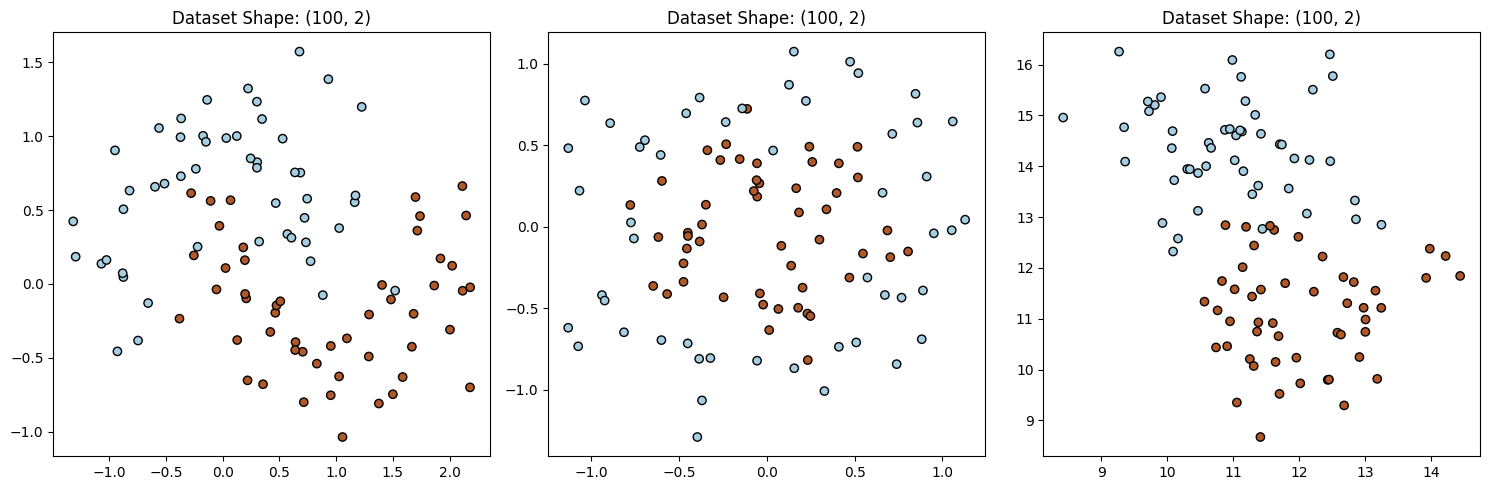

In [5]:
# On va visualiser dabord
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each dataset
for ax, (X, y) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_title(f'Dataset Shape: {X.shape}')

plt.tight_layout()
plt.show()

#NumPy: Régression Logistique

On va construire sur ce qu'on avait fait en cours avec la régeréssion linéaire et essayer de créer un modèle linéaire pour la classification.  Etant donné un ensemble de variable explicatives $\mX\in \sR^{n\times d}$  et une variable expliqué $\vy\in \{0,1\}^{d}$ qui represente la classe d'appartenance de chaque point. Notre objectif est de trouver $\beta$ qui minimise l'erreur de prédiction:

$$L(\beta)= - \sum_i y_i \log(\sigma(\vx_i\beta)) + (1-y_i) \log(1-\sigma(\vx_i\beta))$$ (Cross-Entropy Loss)

tel que $\sigma$ represente la foncion sigmoide ou la fonction logitstique :

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

On appelle le modèle qui découle de cette formulation la régréssion logistique. C'est une technique de modélisation pour prédire des résultats binaires (Oui/Non) en utilisant des coefficients pour expliquer la relation entre les variables explicatives et le résultat.

Créez une classe ```LogisticRegresion``` qui continent (entre autres) les méthodes :
- ```fit(X, y)```: calcule les paramètres du modèle selon les données
- ```predict(X)```: crée les prédictions pour $X$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class LogisticRegression:
    def __init__(self, X, y, optimizer='gradient_descent', learning_rate=0.01, n_iterations=1000):
        self.X = self.add_intercept(X)
        self.beta = np.zeros(X.shape[1])
        self.y = y
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def gradient_descent(self, X, y):
        '''
        λ  = valeur singulière la plus grande de  X
        α=4λ2
        t = 0
        Tant que  t<niterations :
        ∇L=XT(σ(Xβ)−y)
        β=β−α∇L
        t=t+1
        '''
        lambda_val = np.max(X)
        alpha = 4 * lambda_val ** 2
        t = 0

        while t < self.n_iterations:
            z = np.dot(X, self.beta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, h - y)
            self.beta -= alpha * gradient
            t += 1

    def newton_method(self, X, y):
        '''
        t=0
        Tant que  t<niterations :
        H=∇2L=XTdiag(σ(Xβ)1−σ(Xβ))X
        β=β−H−1.∇L
        t=t+1
        '''
        t = 0

        while t < self.n_iterations:
            z = np.dot(X, self.beta)
            h = self.sigmoid(z)
            diag_matrix = np.diag(h * (1 - h))
            hessian = np.dot(np.dot(X.T, diag_matrix), X)
            gradient = np.dot(X.T, h - y) #deltaL
            self.beta -= np.dot(np.linalg.inv(hessian), gradient)
            t += 1

    def fit(self, X, y):
        if self.optimizer == 'gradient_descent':
            self.gradient_descent(X, y)
        elif self.optimizer == 'newton_method':
            self.newton_method(X, y)
        else:
            raise ValueError("Invalid optimizer. Supported optimizers are 'gradient_descent' and 'newton_method'.")

    def predict(self, X):
        z = np.dot(X, self.beta)
        predictions = self.sigmoid(z)
        return np.round(predictions)


    def plot_decision_boundary(self, X, y):
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
        cmap_points = ListedColormap(['#FF0000', '#0000FF'])

        plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolors='k', s=30)
        plt.title("Decision Boundary and Points")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

In [7]:
def test(optimizer='gradient_descent'):


    fig, axs = plt.subplots(1, len(datasets), figsize=(15, 5))

    for i, (dataset, ax) in enumerate(zip(datasets, axs)):
        X, y = dataset  # ignoring the intercept for a 2D plot
        model = LogisticRegression(X,y,optimizer=optimizer, learning_rate=0.01, n_iterations=1000)

        model.fit(X, y)

        # Decision boundary with min and max
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary and scatter plot
        ax.contourf(xx, yy, Z, alpha=0.8)
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)

        ax.set_title('Decision Boundary - Dataset {}'.format(i + 1))
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

    plt.show()


## Optimisation par descente de gradient

Comme pour la régression linéaire il faut rajouter une colonne de 1 à X. L'algorithme de descente de gradient est le suivant :

- $\lambda$ = valeur singulière la plus grande de $X$
- $\alpha = \frac{4}{\lambda^2}$
- t = 0
- Tant que $t < n_{\text{iterations}}$:
  - $\nabla L= X^T(\sigma(X\beta)-y)$
  - $\beta = \beta - \alpha\nabla L$
  - $t=t+1$


<ipython-input-6-dfdfd0330f58>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


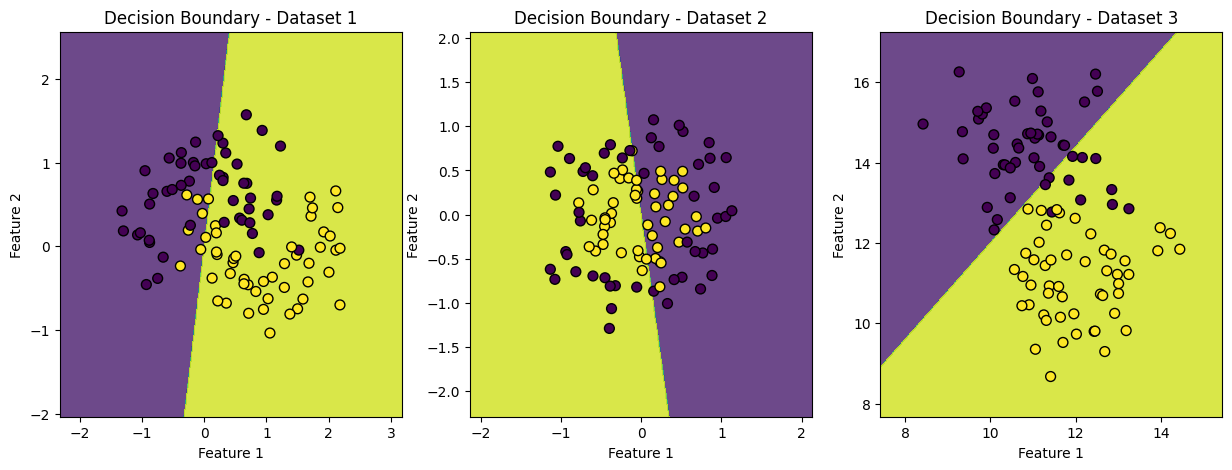

In [8]:
test(optimizer ='gradient_descent')

## Optimisation par la méthode Newton
Une méthode qui a une vitesse de convergence plus grande que celle de la descente de gradient est celle de Newton. Son pseudo code est le suivant :
- $t = 0$
- Tant que $t < n_{\text{iterations}}$:
  - $H = \nabla^2 L= X^T\text{diag}\left(\frac{\sigma(X\beta)}{1-\sigma(X\beta)}\right)X$
  - $\beta = \beta - H^{-1} . \nabla L$
  - $t=t+1$

Ajouter un paramètre ```optimizer``` au constructeur qui permet de choisir la méthode d'optimisation. La méthode par défaut est supposé être la descente de gradient.

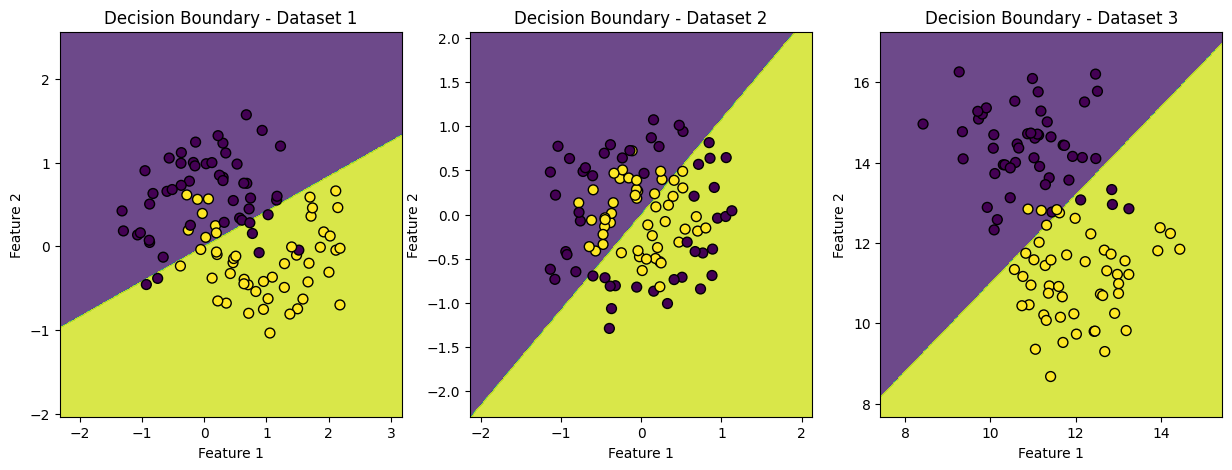

In [9]:
test(optimizer ='newton_method')

## Comparaison de la vitesse de convergence

Sur les trois datasets, afficher l'évolution de la fonction objectif des deux méthodes en fonction de l'itération (sur le même plot pour chaque dataset).

<ipython-input-6-dfdfd0330f58>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


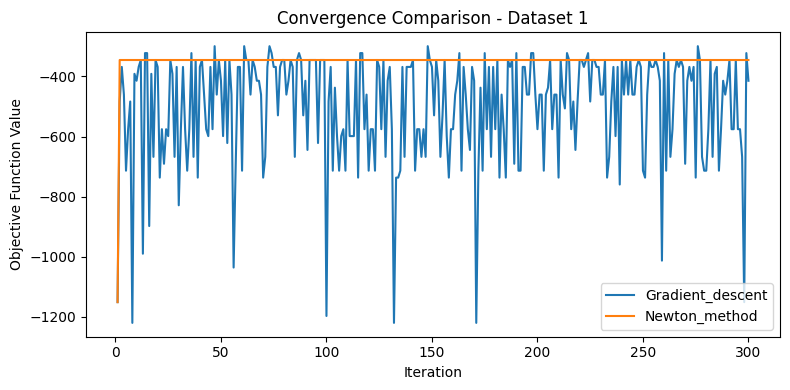

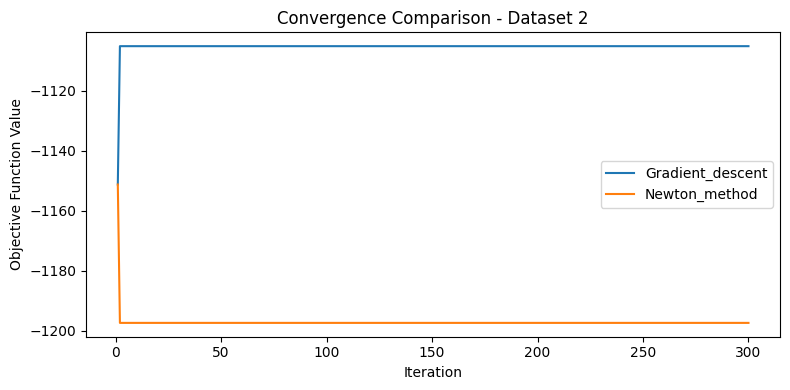

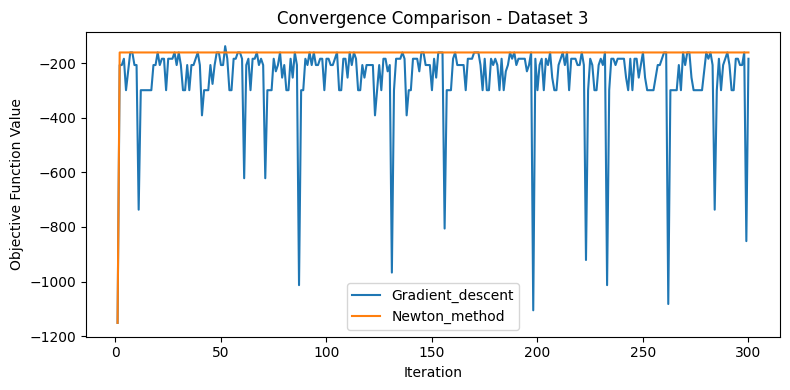

In [10]:
def compare_convergence(optimizer1='gradient_descent', optimizer2='newton_method'):
    epsilon = 1e-10

    for i, dataset in enumerate(datasets):
        X, y = dataset

        model1 = LogisticRegression(X, y, optimizer=optimizer1, learning_rate=0.01, n_iterations=300)
        model2 = LogisticRegression(X, y, optimizer=optimizer2, learning_rate=0.01, n_iterations=300)

        # Fit the models and record the objective function values
        objective_values1, objective_values2 = [], []
        for _ in range(model1.n_iterations):
            h1 = model1.predict(X)
            # Apply numerical stabilization to the objective function
            objective1 = np.sum(y * np.log(h1 + epsilon) + (1 - y) * np.log(1 - h1 + epsilon))
            objective_values1.append(objective1)
            model1.gradient_descent(X, y)

            h2 = model2.predict(X)
            # Apply numerical stabilization to the objective function
            objective2 = np.sum(y * np.log(h2 + epsilon) + (1 - y) * np.log(1 - h2 + epsilon)) #L(β)=∑iyilog(σ(xiβ))+(1−yi)log(1−σ(xiβ)) ne marche
            objective_values2.append(objective2)
            model2.newton_method(X, y)

        # Plot the convergence curves for each optimizer in one figure
        plt.figure(figsize=(8, 4))

        plt.plot(range(1, model1.n_iterations + 1), objective_values1, label=optimizer1.capitalize())
        plt.plot(range(1, model2.n_iterations + 1), objective_values2, label=optimizer2.capitalize())

        plt.title(f'Convergence Comparison - Dataset {i + 1}')
        plt.xlabel('Iteration')
        plt.ylabel('Objective Function Value')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Compare convergence for both optimizers on each dataset
compare_convergence(optimizer1='gradient_descent', optimizer2='newton_method')


## Arbres de Décision

L'algorithme des arbres de décision est une méthode d'apprentissage automatique largement utilisée pour la classification et la régression. Le principe de l'algorithme des arbres de décision repose sur la création d'une structure arborescente qui permet de prendre des décisions basées sur des caractéristiques (variables) des données. Voici comment fonctionne cet algorithme pour la classification :

1. **Sélection de la caractéristique de division :** L'algorithme commence par sélectionner la caractéristique (variable) qui, lorsqu'elle est utilisée pour diviser les données, maximise la séparation entre les différentes classes de sortie. L'objectif est de trouver la caractéristique qui rend les sous-ensembles de données résultants aussi homogènes que possible en termes de classe. Les methodes Utilisees pour l selection sont soit gini soit entropy

2. **Division des données :** Une fois la caractéristique de division sélectionnée, les données d'entraînement sont divisées en sous-ensembles en fonction des valeurs possibles de cette caractéristique. Par exemple, si la caractéristique est la "couleur", les données peuvent être divisées en sous-ensembles pour chaque couleur (rouge, vert, bleu, etc.).

3. **Répétition :** Les étapes 1 et 2 sont répétées pour chaque sous-ensemble résultant. L'algorithme cherche à diviser chaque sous-ensemble en utilisant la caractéristique qui maximise la séparation des classes.

4. **Arrêt :** L'algorithme s'arrête lorsqu'une condition d'arrêt est satisfaite. Cela peut être lorsque tous les sous-ensembles sont suffisamment homogènes (par exemple, tous les exemples dans un sous-ensemble appartiennent à la même classe).

5. **Attribution de classe :** Une fois que l'arbre de décision est construit, il peut être utilisé pour attribuer une classe ou une étiquette à de nouvelles données en suivant les règles de classification définies par l'arbre. Les données sont acheminées le long des branches de l'arbre en fonction de leurs caractéristiques jusqu'à ce qu'une feuille de l'arbre soit atteinte, ce qui correspond à la classe attribuée.


Créer une classe DecisionTree qui contient entre autres :
 - Un constructeur ```DecisionTree(criterion)``` où ```criterion``` est le critère d'impurité utilisé dans l'arbre. Il peut soit être l'entropy ou l'impurité gini.
 - la méthode ```fit(X, y)``` qui crée l'arbre de decision.
 - la méthode ```predict(X)``` qui retourne le classe de chaque observation dans $X$.

<img src='https://drive.google.com/uc?export=view&id=1Y_0ItBEU1nGLer7uQndGRmOiSCQfenTZ'/>

Ici pour ```criterion="gini"``` nous avons :
$$H(Q)=1-\sum_{i=0}^{k-1} \left(\frac{n_i}{n}\right)^2$$
où $n_i$ est le nombre de points dans la classe $i$ qui se trouve dans $Q$ et $k$ est le nombre de classes. Et pour ```criterion="entropy"``` nous avons :
$$H(Q)=-\sum_{i=0}^{k-1} \frac{n_i}{n}\log_2 \frac{n_i}{n}$$

In [4]:
import pandas as pd
class DecisionTree:
    def __init__(self, criterion="gini"):
        if criterion not in ["gini", "entropy"]:
            raise ValueError("Criterion must be 'gini' or 'entropy'")
        self.criterion = criterion
        self.tree = None

    def _impurity(self, y):
        num_samples = len(y)
        if self.criterion == "gini":
            unique_classes = pd.Series(y).value_counts()
            impurity = 1 - sum((n / num_samples) ** 2 for n in unique_classes)
        elif self.criterion == "entropy":
            unique_classes = pd.Series(y).value_counts()
            impurity = -sum((n / num_samples) * (np.log2(n / num_samples)) for n in unique_classes)
        return impurity

    def fit(self, X, y):
        self.tree = self._fit(X, y)

    def _fit(self, X, y):
        if len(pd.Series(y).unique()) == 1:
            return pd.Series(y).iloc[0]
        if len(X.columns) == 0:
            return pd.Series(y).value_counts().idxmax()
        best_split, best_impurity = None, float('inf')
        for feature in X.columns:
            unique_values = X[feature].unique()
            for value in unique_values:
                left_mask = X[feature] <= value
                right_mask = X[feature] > value
                left_impurity = self._impurity(y[left_mask])
                right_impurity = self._impurity(y[right_mask])
                weighted_impurity = (left_impurity * len(y[left_mask]) + right_impurity * len(y[right_mask])) / len(y)
                if weighted_impurity < best_impurity:
                    best_split, best_impurity = (feature, value), weighted_impurity
        if best_split is None:
            return pd.Series(y).value_counts().idxmax()
        feature, value = best_split
        left_mask = X[feature] <= value
        right_mask = X[feature] > value
        left_tree = self._fit(X[left_mask], y[left_mask])
        right_tree = self._fit(X[right_mask], y[right_mask])
        return (feature, value, left_tree, right_tree)

    def predict(self, X):
        return X.apply(lambda row: self._predict(row, self.tree), axis=1)

    def _predict(self, row, tree):
        if not isinstance(tree, tuple):
            return tree
        feature, value, left_tree, right_tree = tree
        if row[feature] <= value:
            return self._predict(row, left_tree)
        else:
            return self._predict(row, right_tree)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


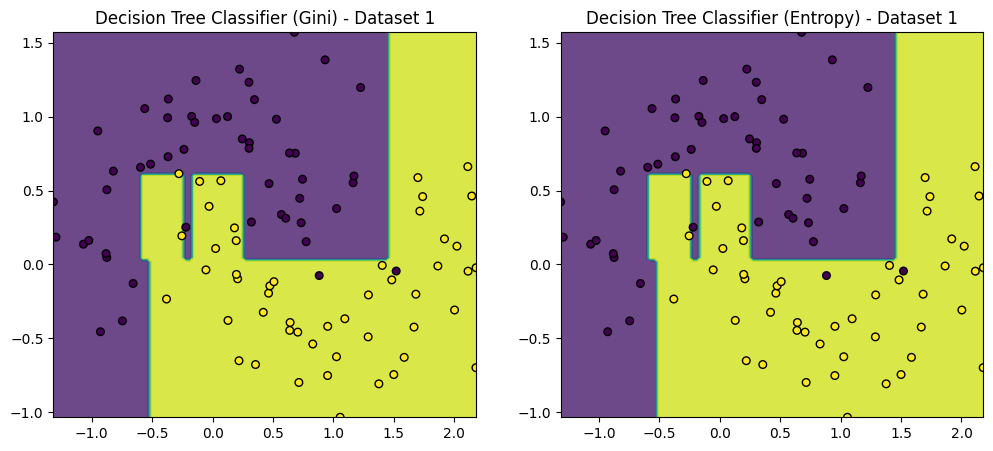

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


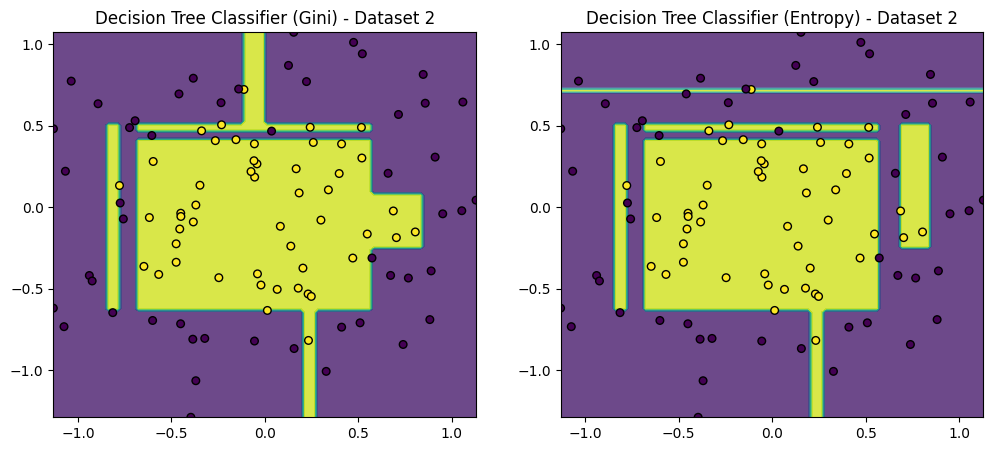

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


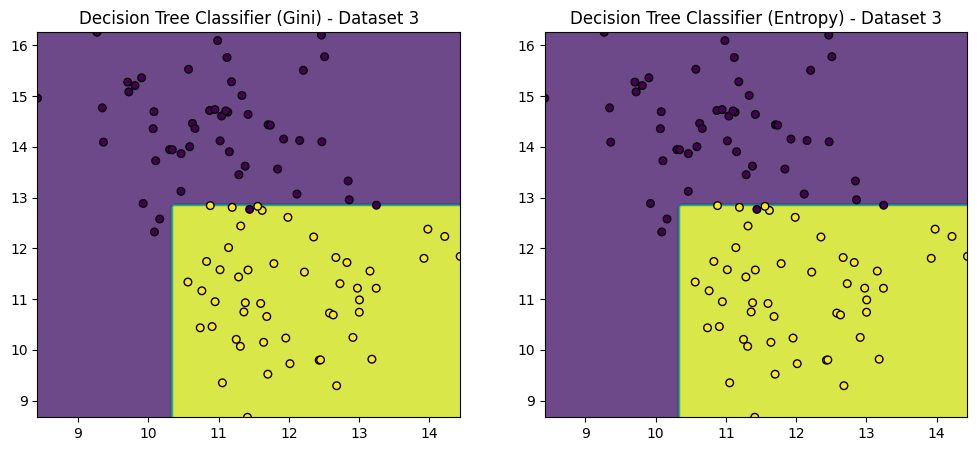

In [6]:
import pandas as pd
from sklearn.datasets import make_moons, make_circles, make_blobs
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Fit and visualize the decision boundaries
for idx, dataset in enumerate(datasets):
    X, y = dataset
    X = pd.DataFrame(X, columns=['feature1', 'feature2'])
    y = pd.Series(y)

    # Decision Tree with Gini criterion
    clf_gini = DecisionTreeClassifier(criterion="gini")
    clf_gini.fit(X, y)
    y_pred_gini = clf_gini.predict(X)

    # Decision Tree with Entropy criterion
    clf_entropy = DecisionTreeClassifier(criterion="entropy")
    clf_entropy.fit(X, y)
    y_pred_entropy = clf_entropy.predict(X)

    # Plot decision boundaries and color points based on predictions
    plt.figure(figsize=(12, 5))

    # Plot Decision Tree (Gini)
    plt.subplot(1, 2, 1)
    plt.title(f'Decision Tree Classifier (Gini) - Dataset {idx + 1}')
    xx, yy = np.meshgrid(np.linspace(X['feature1'].min(), X['feature1'].max(), 100),
                         np.linspace(X['feature2'].min(), X['feature2'].max(), 100))
    Z = clf_gini.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X['feature1'], X['feature2'], c=y, cmap='viridis', edgecolor='k', s=30)

    # Plot Decision Tree (Entropy)
    plt.subplot(1, 2, 2)
    plt.title(f'Decision Tree Classifier (Entropy) - Dataset {idx + 1}')
    Z = clf_entropy.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X['feature1'], X['feature2'], c=y, cmap='viridis', edgecolor='k', s=30)

    plt.show()


## Forêt Aléatoire

Le principe du Random Forest (forêt aléatoire en français) est une technique d'apprentissage automatique largement utilisée pour la classification, la régression et d'autres tâches liées à la prédiction. Il appartient à la catégorie des méthodes d'ensemble, qui consistent à combiner les prédictions de plusieurs modèles pour obtenir une prédiction plus robuste et précise. Voici comment fonctionne le Random Forest:

- Création de multiples arbres de décision : Le Random Forest crée un certain nombre d'arbres de décision indépendants. Chaque arbre est construit en utilisant un sous-ensemble aléatoire des données d'apprentissage et un sous-ensemble aléatoire des caractéristiques. Cela signifie que chaque arbre est entraîné sur un échantillon différent des données et des caractéristiques.

- Entraînement des arbres de décision : Chaque arbre de décision est construit en suivant les règles d'un arbre de décision classique. Il divise les données d'apprentissage en fonction des caractéristiques pour minimiser l'erreur de prédiction. Cependant, étant donné que les arbres sont construits avec des sous-ensembles aléatoires de données et de caractéristiques, ils sont différents les uns des autres.

- Agrégation des prédictions : Une fois que tous les arbres sont construits, le Random Forest agrège leurs prédictions pour obtenir une prédiction finale. Pour la classification, il s'agit généralement d'un vote majoritaire parmi les arbres. Pour la régression, il s'agit souvent de la moyenne des prédictions.

L'un des avantages clés du Random Forest est sa capacité à réduire le surajustement (overfitting). En utilisant des sous-ensembles aléatoires de données et de caractéristiques, les arbres individuels sont plus simples et plus sujets au surajustement. L'agrégation des prédictions à partir de plusieurs arbres contribue également à améliorer la généralisation du modèle.

Créer une classe RandomForest qui contient entre autres :
 - Le constructeur ```RandomForest(n_estimators, criterion)``` où ```n_estimators``` est le nomber d'arbres dans la forêt. ```criterion``` selectionne les criterions des arbres constituant la forêt.
 - la méthode ```fit(X, y)``` qui crée la forêt.
 - la méthode ```predict(X)``` qui retourne le classe de chaque observation dans $X$.

<img src='https://drive.google.com/uc?export=view&id=1YdaEMvVQT3wUo3FaWWH_R3LSFGkOk9nw'/>

Dans ce pseudocode $M$ correspond à ```n_estimators```. Chaque $h$ est un arbre different et boostrap signifie choisir $n$ observations aléatoirement avec un tirage avec remise depuis le dataset.


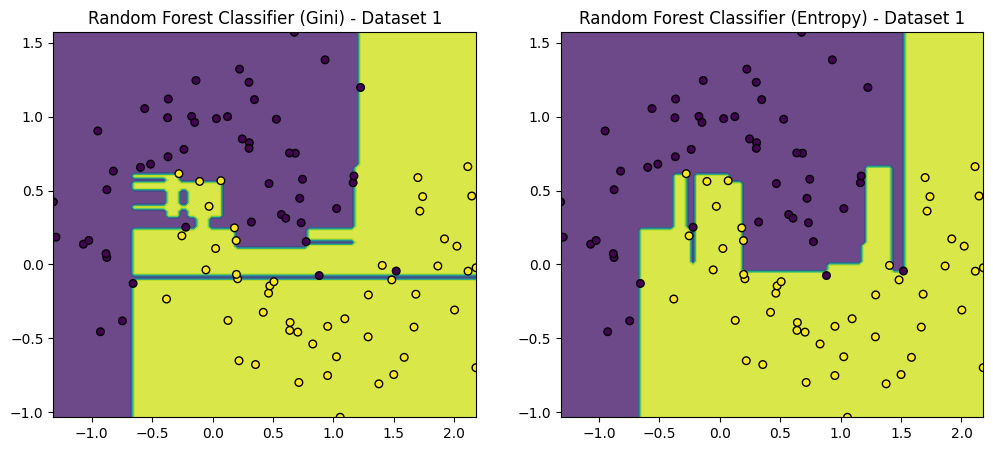

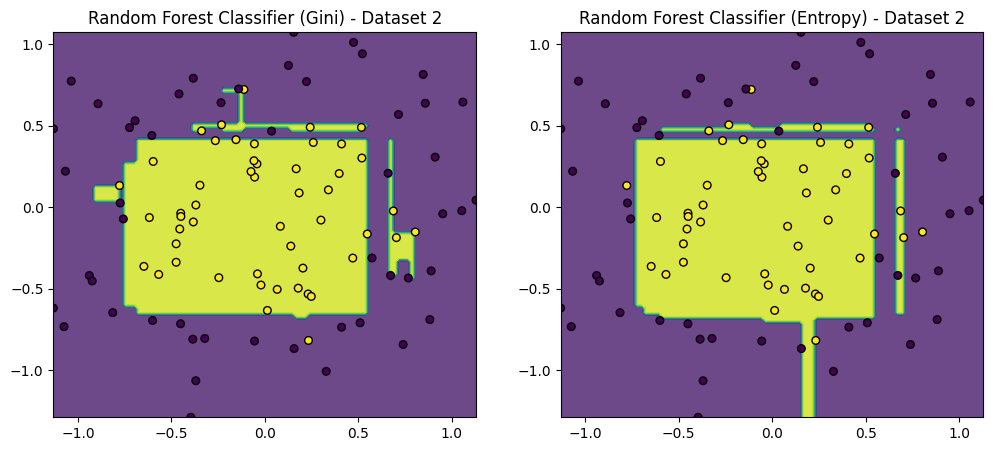

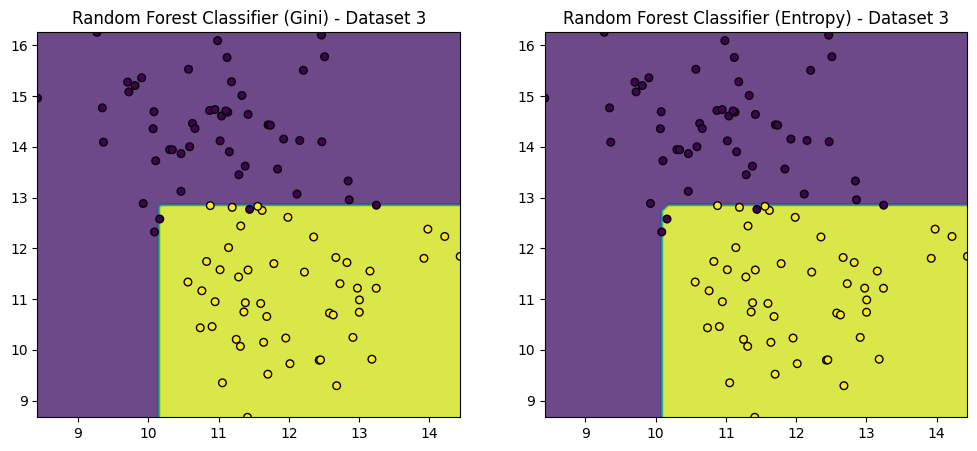

In [9]:
import pandas as pd
import numpy as np
import random

class RandomForest:
    def __init__(self, n_estimators, criterion="gini"):
        if criterion not in ["gini", "entropy"]:
            raise ValueError("Criterion must be 'gini' or 'entropy'")
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Create a bootstrap sample with replacement
            n_samples = X.shape[0]
            sample_indices = [random.randint(0, n_samples - 1) for _ in range(n_samples)]
            X_sample = X.iloc[sample_indices]
            y_sample = y.iloc[sample_indices]

            # Create a decision tree and fit it to the sample
            tree = DecisionTree(criterion=self.criterion)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.trees]
        # Perform majority voting for classification
        # If regression, you can return the mean of predictions
        return pd.DataFrame(predictions).mode(axis=0).iloc[0]

# Now, let's use the RandomForest class to fit and visualize the decision boundaries

# Create datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Fit and visualize the decision boundaries using the RandomForest
for idx, dataset in enumerate(datasets):
    X, y = dataset
    X = pd.DataFrame(X, columns=['feature1', 'feature2'])
    y = pd.Series(y)

    # Create a RandomForest with 10 trees and Gini criterion
    rf_gini = RandomForest(n_estimators=10, criterion="gini")
    rf_gini.fit(X, y)
    y_pred_gini = rf_gini.predict(X)

    # Create a RandomForest with 10 trees and Entropy criterion
    rf_entropy = RandomForest(n_estimators=10, criterion="entropy")
    rf_entropy.fit(X, y)
    y_pred_entropy = rf_entropy.predict(X)

    # Plot decision boundaries and color points based on predictions
    plt.figure(figsize=(12, 5))

    # Plot RandomForest (Gini)
    plt.subplot(1, 2, 1)
    plt.title(f'Random Forest Classifier (Gini) - Dataset {idx + 1}')
    xx, yy = np.meshgrid(np.linspace(X['feature1'].min(), X['feature1'].max(), 100),
                         np.linspace(X['feature2'].min(), X['feature2'].max(), 100))
    Z = rf_gini.predict(pd.DataFrame({'feature1': xx.ravel(), 'feature2': yy.ravel()})).values.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X['feature1'], X['feature2'], c=y, cmap='viridis', edgecolor='k', s=30)

    # Plot RandomForest (Entropy)
    plt.subplot(1, 2, 2)
    plt.title(f'Random Forest Classifier (Entropy) - Dataset {idx + 1}')
    Z = rf_entropy.predict(pd.DataFrame({'feature1': xx.ravel(), 'feature2': yy.ravel()})).values.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X['feature1'], X['feature2'], c=y, cmap='viridis', edgecolor='k', s=30)

    plt.show()
